# Part 2: EDA
**Predicting Electric Vehicle(EV) chargepoints in England)**

## Approach

The EDA - Part 2 approach will be to investigate:
1. The proposed features and how they are distributed (normal, skew etc)
2. Outliers that exist and attempt to address them
3. Correlation between the features and the target variable

## Definitions
**EV charge point/charging unit** – a single upstand or wall-mounted structure offering one or more socket outlets or tethered plugs suitable for charging EVs.

**EV charging station** – a physical site with at least one charge point installed suitable for charging at least two EVs. A station usually (but not always) has other physical structures accompanying the charge point(s) such as an energy supply enclosure (feeder pillar), weather shelter, signage, protection barriers for the equipment.

**Middle Layer Super Output Area (MSOA)** - A government tracked area that has a minimum population size of 5,000 and a maximum population size of 15,000



| **Geography** | **Minimum population** | **Maximum population** | **Minimum number of households** | **Maximum number of households** |
| ------------- | ---------------------- | ---------------------- | -------------------------------- | -------------------------------- |
| LSOA          | 1,000                  | 3,000                  | 400                              | 1,200                            |
| MSOA          | 5,000                  | 15,000                 | 2,000                            | 6,000                            |

## Feature variables Distribution
### Do the features in the dataset have considerable variance, are they normally distributed?

1. 4.1% of feature variables (11) approached a normal distribution based on a skew criterion of within $\pm 0.5$ and a kurtosis criterion of $\pm3$.
2. The remaining 95.9% had positively skewed distributions
3. 12.5% of feature variables (34) were positively skewed with good kurtosis
4. The `cycle_from_work_nhb` feature had a distribution most similar to the number of EV chargepoints
5. Most variables therefore had substantial amount of outliers
><font color='blue' font size=4pt>*The distribution of feature variables are mostly positively skewed with only 4.1% being normally distributed; Significant outliers in the variables exist*</font>

### Which features are most correlated to the number of EV charge points?

The features most related to the number of EV charge points in the various domains were as follows:

>**Socio-Economic:** *Working age population size and barriers to housing*<br> 
`workingage_pop`(0.223), `16_59_pop`(0.218) and `widerbar_score`(0.153) 

>**Transportation:** *Number of journeys by bus to social events, work and shopping; carpools to employers business*<br>
`carpassenger_to_empbus_nhb`(0.446),`buscoach_to_social_nhb`(0.445),<br>`buscoach_from_work`(0.441),`buscoach_to_shopping_nhb`      (0.440)  

>**Car Ownership:** *No car ownership and EV car ownership for first quarter 2019 and 3rd quarter 2018*<br>
`no_car`(0.221),`2019_q1`(0.133),`2018_q3`(0.133)


>**Geo-spatial:** *Number of car parking lots, train stations and gas/service stations*<br>
`num_parking`(0.380),`num_train_st`(0.284),`num_gas_st`(0.171)

>**Electricity Consumption:** *Non-domestic electiricty consumption rates and the number of domestic and non-domestic electricity meters*<br>
`elec_nd_con`(0.381),`nd_meters`(0.340),`d_meters`(0.187)

><font color='blue' font size=4pt>*There is weak correlation between most features with transportation features showing the best correlations*</font>

<table>
    <tr>
        <td><img src='../reports/figures/EVcorrheatmap.jpg'><figcaption><b>Figure 1c</b></figcaption></td>
    </tr>
</table><br>

## Roadblocks, Setbacks, Surprises & Next Steps

### Roadblocks
1. Weak linear correlations with the number of EV charge points in an area; This may require the limitation of modelling to a classification approach with a focus on the use of non-linear models (tree ensembles,boosting, bagging, knn etc)

2. Having the exact figures for EV car registrations per MSOA. This information is very hard to come by. An estimation based on EV ownership per local authority was used as a gauge for EV car registrations per MSOA

### Surprises
1. EV car ownership had a weak correlation to the number of EV charge points in an area
2. Non-domestic electricity consumption in an area is highly correlated to the number of journeys people make by any mode to  do shopping, attend social events or conduct employers business!

### Next Steps
1. Model EV chargepoint estimation using a classification approach; Attempt to transform variables that have a skewed distribution.
2. Focus on precision in the model given the sparse distribution of EV charge points accross the country (uneven class weighting). If this model is ultimately geared towards identifying areas that should have chargepoints for future public/private investment, having a high precision is critical.
3. Utilize  logistic regression after transformation or use an ensemble or KNN modeling approach due to non-linearity.

## Limitations

Estimates based on EV ownership per local authority were made; actual figures were not used

## Visual analysis

In [1]:
# Importing all needed packages
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

#from __future__ import print_function


# Importing prepared dataframe with chargepoint information (features and target)
df = pd.read_csv("../data/interim/msoa/full_dataset_msoa.csv")

df.loc[:, 'elec_d_con':'elec_nd_con_mdn'] = df.loc[:,
                                                   'elec_d_con':'elec_nd_con_mdn'].apply(lambda x: abs(x))

In [2]:
%run preprocessing_functions.ipynb

### Distributions of Features
#### Calculating mean, skew and kurtosis

In [3]:
# Building mean, skew and kurtosis table for evaluation of features
mean = df.mean()
mean.name = 'mean'
skew = df.skew()
skew.name = 'skew'
kurtosis = df.kurtosis()
kurtosis.name = 'kurtosis'

msk = pd.concat([mean, skew, kurtosis], axis=1)

#### Which feature has a distribution most like the target variable?

In [4]:
# Printing target variable skewness and kurtosis
print(skew.charge_points)
print(kurtosis.charge_points)

12.466619767430645
308.72900880475754


In [5]:
# feature variable with a skewness and kurtosis that are very similar will fit this criteria
# Setting up search margins above and below the target variable statistics
margin_skew = 0.5
margin_kurt = 2

# Printing variable that is most similar in skewness and kurtosis
print(skew[(skew <= skew.charge_points+margin_skew) & (skew >= skew.charge_points-margin_skew) &
           (kurtosis <= kurtosis.charge_points+margin_kurt) & (kurtosis >= kurtosis.charge_points-margin_kurt)])

print(kurtosis[(skew <= skew.charge_points+margin_skew) & (skew >= skew.charge_points-margin_skew) &
               (kurtosis <= kurtosis.charge_points+margin_kurt) & (kurtosis >= kurtosis.charge_points-margin_kurt)])

cycle_from_work_nhb    11.968047
charge_points          12.466620
Name: skew, dtype: float64
cycle_from_work_nhb    310.610226
charge_points          308.729009
Name: kurtosis, dtype: float64


Text(0.5, 0, 'Number of EV charge points')

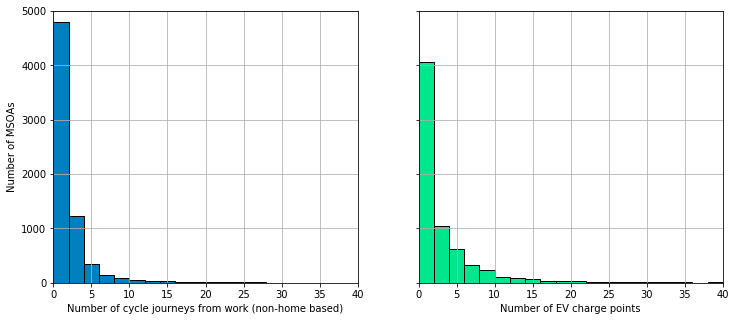

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
df.cycle_from_work_nhb.hist(bins=np.linspace(
    0, 40, 21), ec='k', color=cm.winter(0.5), ax=ax[0])
df.charge_points.hist(bins=np.linspace(0, 40, 21), ec='k',
                      color=cm.winter(0.9), ax=ax[1])

# Cycle from work feature variable
ax[0].set_ylabel("Number of MSOAs")
ax[0].set_xlabel("Number of cycle journeys from work (non-home based)")
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 5000)

# Charge points target variable
ax[1].set_xlim(0, 40)
ax[1].set_ylim(0, 5000)
ax[1].set_xlabel("Number of EV charge points")

In [7]:
# Creating histogram plotting function for individual feature


def plot_original_hist(variable, df):

    the_variable = df[variable]
    skew = the_variable.skew()
    kurtosis = the_variable.kurtosis()
    the_mean = the_variable.mean()
    the_median = the_variable.median()
    the_std = the_variable.std()
    print(f"{the_variable.name}", end="----> ")
    print(f"Mean: {the_mean:.3f} ", end="----> ")
    print(f"Median: {the_median:.3f} ", end="----> ")
    print(f"StdDev: {the_std:.3f} ", end="----> ")
    print(f"Skew: {skew:.3f} ", end="----> ")
    print(f"Kurtosis:{kurtosis:.3f}")

    fig, ax = plt.subplots(figsize=(5, 5))
    the_variable.hist(bins=30, color=cm.winter(0.7), ec='k', ax=ax)
    ax.set_xlabel(f"{variable}", fontsize=20)
    ax.set_ylabel("frequency", fontsize=20)
    ax.grid(False)
    plt.savefig("../reports/figures/histograms/"+variable+"_hist_original.jpg", dpi=800, transparent=False,
                edgecolor='k', facecolor='w', pad_inches=0.1, bbox_inches='tight')
    return display()


def plot_transformed_hist(variable, df):

    the_variable = df[variable]
    skew = the_variable.skew()
    kurtosis = the_variable.kurtosis()
    the_mean = the_variable.mean()
    the_median = the_variable.median()
    the_std = the_variable.std()
    print(f"{the_variable.name}", end="----> ")
    print(f"Mean: {the_mean:.3f} ", end="----> ")
    print(f"Median: {the_median:.3f} ", end="----> ")
    print(f"StdDev: {the_std:.3f} ", end="----> ")
    print(f"Skew: {skew:.3f} ", end="----> ")
    print(f"Kurtosis:{kurtosis:.3f}")

    fig, ax = plt.subplots(figsize=(5, 5))
    the_variable.hist(bins=30, color=cm.winter(0.7), ec='k', ax=ax)
    ax.set_xlabel(f"{variable}", fontsize=20)
    ax.set_ylabel("frequency", fontsize=20)
    ax.grid(False)
    plt.savefig("../reports/figures/histograms/"+variable+"_hist_transform.jpg", dpi=800, transparent=False,
                edgecolor='k', facecolor='w', pad_inches=0.1, bbox_inches='tight')
    return display()

metropolitan----> Mean: 0.366 ----> Median: 0.000 ----> StdDev: 0.482 ----> Skew: 0.557 ----> Kurtosis:-1.690


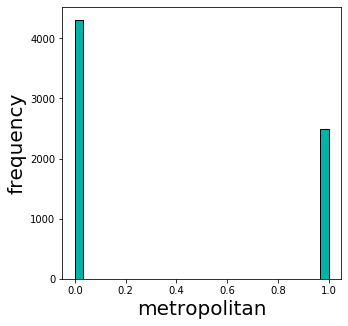

In [8]:
for x in df.columns[274:275]:
    plot_original_hist(x,df)

In [9]:
# Writing a function to display transformed features (Box Plot + Interactive Histogram)

def transform_and_plot(start, end, file, power=False, log=False, stand=False, aggreg=False, remove=[]):

    features = df.loc[:, start:end]
    features = features.drop(remove, axis=1)
    features_col = features.columns

    if aggreg == True:
        features = TransportAggregate().fit_transform(features)
        features_col = features.columns

    if log == True:
        features = features.apply(lambda x: np.log1p(x))
        features = pd.DataFrame(features, columns=features_col)

    if power == True and np.any(features <= 0) == True:

        features = PowerTransformer('yeo-johnson').fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    elif power == True and np.any(features <= 0) == False:
        print(PowerTransformer('box-cox').fit(features).lambdas_)
        features = PowerTransformer('box-cox').fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    if stand == 1:
        features = StandardScaler().fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)
    elif stand == 2:
        features = MinMaxScaler().fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    else:
        stand == 0
        pass

    fig, ax = plt.subplots(figsize=(12, 9))
    sns.boxplot(data=features, orient='h', notch=True, ax=ax)
    plt.xscale('linear')
    plt.savefig("../reports/figures/boxplots/"+file)

    interact(plot_transformed_hist, variable=features_col,
             df=fixed(features))

    # Building mean, skew and kurtosis table for evaluation of features
    mean = features.mean()
    mean.name = 'mean'
    skew = features.skew()
    skew.name = 'skew'
    kurtosis = features.kurtosis()
    kurtosis.name = 'kurtosis'

    msk = pd.concat([mean, skew, kurtosis], axis=1)

    table = msk.loc[features.columns[0]:features.columns[-1]
                    ].sort_values(by='skew', ascending=True)
    print(table.head())
    print(table.tail())

    return features

#### Socio-Economic Features

> - 5 out of the 12 socio-economic features were positively skewed. A 'box-cox' transformation was used for these variables to establish some normality. The remaining 7 variables were simply standardised with no transformation necessary as they had relatively normal distributions

>1. `indoor_score` was the most normally distributed
>2. `idaopi_score` distribution was the most skewed

[ 0.0364824   0.00689245  0.18947446 -0.05719379  0.63099664]


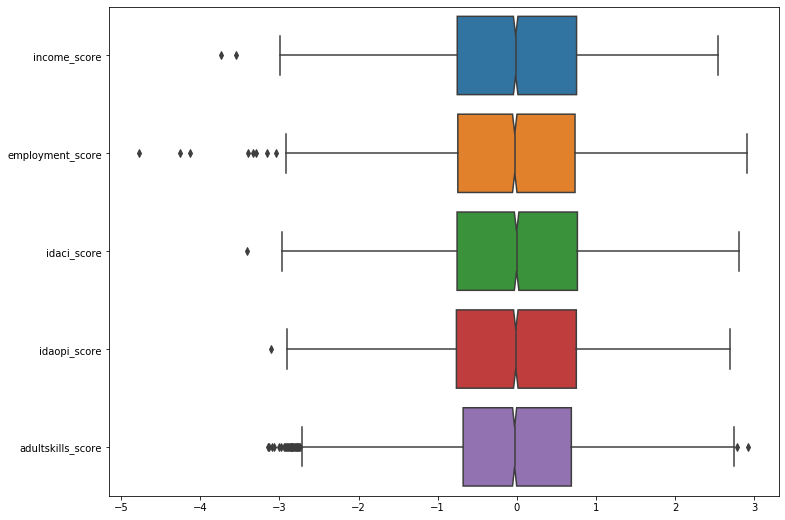

interactive(children=(Dropdown(description='variable', options=('income_score', 'employment_score', 'idaci_sco…

                           mean      skew  kurtosis
idaci_score        6.301100e-16 -0.026772 -0.661636
adultskills_score -8.613833e-16 -0.009491 -0.161620
income_score       5.931217e-17 -0.004807 -0.644144
employment_score   4.953375e-16 -0.000505 -0.398415
idaopi_score      -3.291269e-16  0.007203 -0.613087
                           mean      skew  kurtosis
idaci_score        6.301100e-16 -0.026772 -0.661636
adultskills_score -8.613833e-16 -0.009491 -0.161620
income_score       5.931217e-17 -0.004807 -0.644144
employment_score   4.953375e-16 -0.000505 -0.398415
idaopi_score      -3.291269e-16  0.007203 -0.613087


In [10]:
soc_econ1 = transform_and_plot('income_score', 'adultskills_score', 'soc_econ1_b4_transform.jpg', power=1, log=0, stand=0, remove=[
                               'education_score', 'housebar_score', 'livenv_score', 'health_score', 'crime_score', 'chanyp_score'])

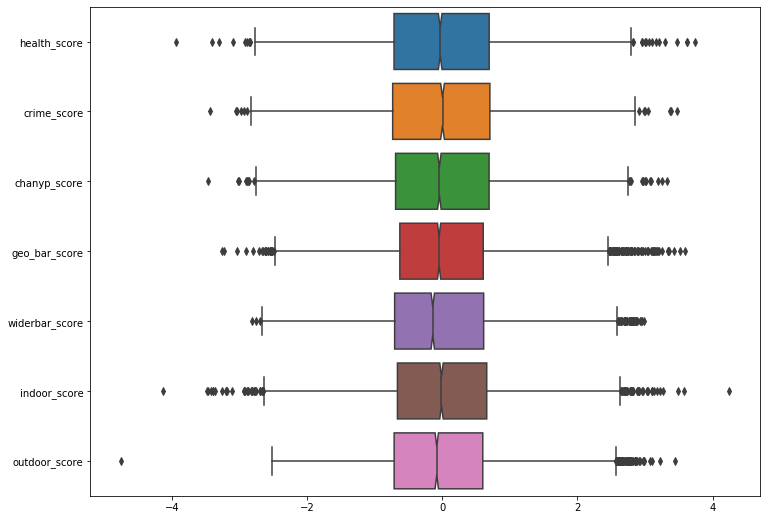

interactive(children=(Dropdown(description='variable', options=('health_score', 'crime_score', 'chanyp_score',…

                       mean      skew  kurtosis
indoor_score   4.123896e-18  0.021628  0.207650
crime_score   -1.472995e-17  0.040719 -0.341164
chanyp_score  -5.182458e-18  0.054708 -0.235483
health_score   7.724641e-18  0.101557 -0.202080
geo_bar_score -1.314415e-17  0.245297  0.250996
                        mean      skew  kurtosis
chanyp_score   -5.182458e-18  0.054708 -0.235483
health_score    7.724641e-18  0.101557 -0.202080
geo_bar_score  -1.314415e-17  0.245297  0.250996
outdoor_score  -1.183628e-17  0.382974 -0.046612
widerbar_score  1.582530e-17  0.457845 -0.152780


In [12]:
soc_econ2 = transform_and_plot('health_score', 'outdoor_score', 'soc_econ2_transformed.jpg', power=0, log=0, stand=1, remove=[
                               'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score', 'adultskills_score'])

#### Population & Income Features

>All features (100%) are positively skewed with no negative or zero values. A logarithmic transformation was used to compress primarily the income features was performed. This was followed by a 'box-cox' power transformation to address the skewness and some outliers.

>1. `total_netafterhsing` was the most normally distributed
>2. `workingage_pop` distribution was the most skewed

[-3.73201136  1.60304103 -3.17780497  4.21741151 -3.71640922 -2.44966322
 -2.03130748 -2.25975833  2.29886063]


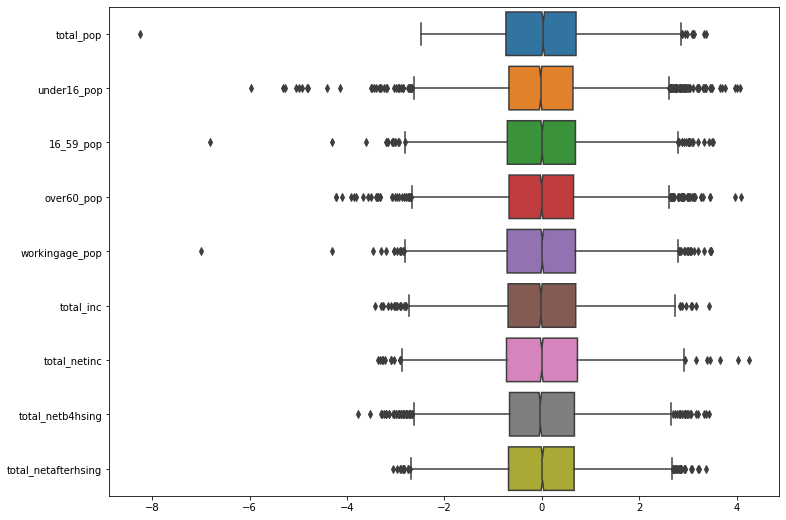

interactive(children=(Dropdown(description='variable', options=('total_pop', 'under16_pop', '16_59_pop', 'over…

                             mean      skew  kurtosis
16_59_pop           -2.666297e-12 -0.002888  0.151456
workingage_pop      -7.598436e-13 -0.002769  0.152477
total_netafterhsing -2.081353e-15 -0.002326 -0.125480
total_pop            2.394565e-12 -0.001242  0.186624
total_netb4hsing    -5.768024e-14 -0.000684  0.055449
                          mean      skew  kurtosis
total_netb4hsing -5.768024e-14 -0.000684  0.055449
total_netinc     -4.068790e-14  0.002612 -0.186843
total_inc         6.908413e-13  0.003586 -0.184782
over60_pop        1.470379e-16  0.024498  0.279246
under16_pop      -2.612155e-16  0.028331  1.057499


In [13]:
population = transform_and_plot(
    'total_pop', 'total_netafterhsing', 'pop_income_transformed.jpg', power=1, log=1)

#### Transportation Features

>All features (100%) are positively skewed with no negative values but not all were non-zero. In order to address zero values the features were aggregated together based on simulatrity to the mode of transportation. After aggregation a logarithmic transformation followed by a 'box-cox' power transformation was used to compress the figures and address the skewness and some outliers.

>1. `cardriver_friends` was the most normally distributed
>2. `rail_work` distribution was the most skewed

[-1.5897872  -1.72373815 -0.19684988 -0.94702591 -2.72832308 -2.40432757
 -2.72230685 -0.13067796 -1.21233265 -0.03366667  0.11025788 -0.03740326
  0.10679702 -0.299765    0.08782358 -2.29785085 -0.06971386 -0.95183245
  0.47631873 -0.81088711 -1.26284555 -1.38274668  2.20784139 -1.51062537
 -0.19924103 -1.4217952   0.02964577 -0.62672534 -1.98385173 -0.58238472
 -4.07121333 -2.85873289 -0.49863843 -0.40381907 -1.64247365 -0.5893151
 -0.59850789 -0.67070618 -0.72645002 -1.20025683 -2.54380202 -2.12939594
 -1.17037193 -1.26836977 -0.97130918 -1.35273104 -1.77455347 -1.65669361]


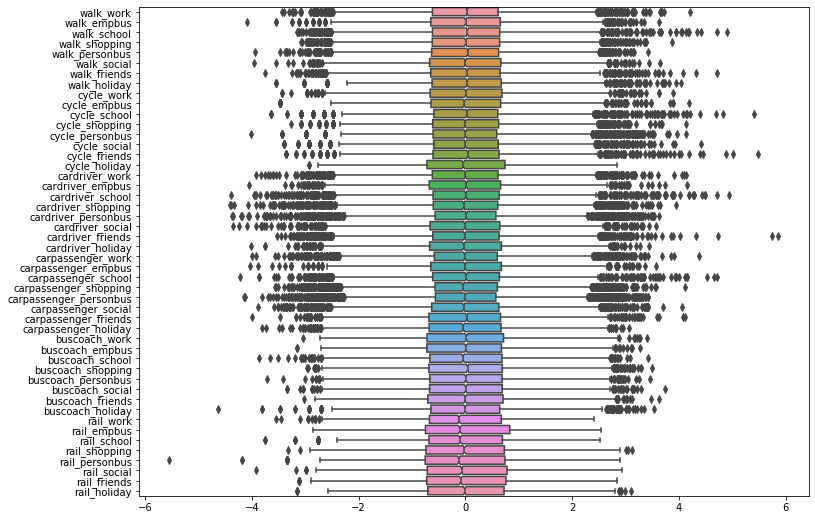

interactive(children=(Dropdown(description='variable', options=('walk_work', 'walk_empbus', 'walk_school', 'wa…

                                mean      skew  kurtosis
carpassenger_personbus -1.932213e-14 -0.056567  1.180461
cardriver_personbus    -2.920362e-14 -0.045633  1.530312
walk_personbus          1.081033e-13 -0.023542  0.336880
walk_friends           -2.213047e-13 -0.020280  0.361101
walk_work               2.682453e-16 -0.016752  0.374824
                       mean      skew  kurtosis
rail_school   -2.121800e-15  0.059132 -0.450527
cycle_holiday -6.704138e-15  0.063900 -0.539777
rail_friends  -2.054673e-16  0.065954 -0.594513
rail_empbus    5.308341e-16  0.114198 -0.713291
rail_work      1.531948e-14  0.116392 -0.513303


In [14]:
transport = transform_and_plot('walk_to_work', 'rail_from_holiday_nhb',
                               "transport_transformed.jpg", power=1, log=1, aggreg=1)

#### Car Ownership & Registration Features

>All features (100%) are positively skewed with no negative values but not all were non-zero. A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `two_car` was the most normally distributed
>2. `2011_q4` distribution was the most skewed

[0.71571403 1.29070658 5.57162782 3.27447594 5.76665571 0.20127083
 0.1721904  0.13493236 0.1082534  0.08579442 0.07569379 0.0713761
 0.07417061 0.05615328 0.04932115 0.04186037 0.05215098 0.05987834
 0.05720915 0.06490561 0.08858778 0.07493289 0.13413085 0.12916797
 0.16396138 0.15574249 0.11590847 0.0926311  0.07037547 0.07663436
 0.04857366 0.05549839 0.02349708 0.03427618 0.07722899 0.08755486]


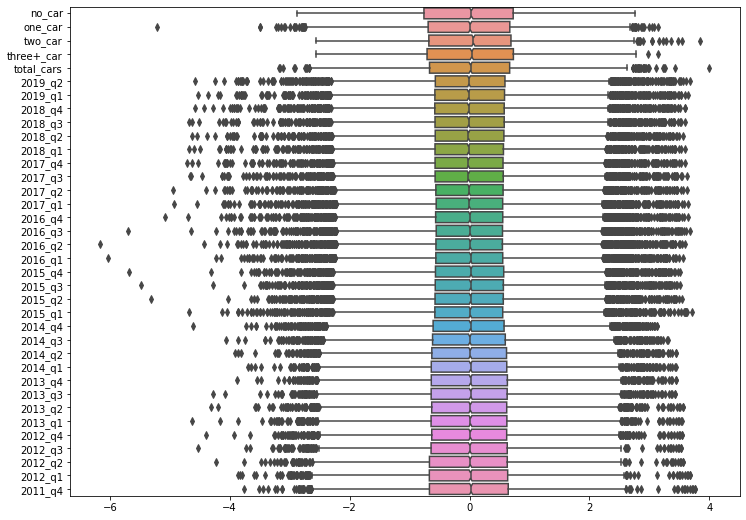

interactive(children=(Dropdown(description='variable', options=('no_car', 'one_car', 'two_car', 'three+_car', …

                    mean      skew  kurtosis
three+_car  2.862613e-16 -0.100272 -0.482193
two_car    -3.266420e-17 -0.074637 -0.247935
no_car      1.330992e-15 -0.016730 -0.662092
total_cars -2.099141e-17 -0.011257 -0.068076
one_car     4.649171e-16  0.000044 -0.008985
                 mean      skew  kurtosis
2014_q3  1.961814e-17  0.011940  0.516306
2018_q4  5.826259e-16  0.013664  1.185963
2019_q1  2.449488e-16  0.016194  1.116000
2019_q2 -2.823050e-16  0.017778  1.067796
2015_q1 -3.616276e-17  0.018602  1.078132


In [15]:
car_ownreg = transform_and_plot('no_car', 'growth', 'car_own_transformed.jpg',
                                log=1, power=1, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'])

#### Geo-Spatial Features

>100% of features appeared to be positively skewed with no negative values but with zero values. A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `st_lengthshape` was the most normally distributed (number of supermarkets in a MSOA) 
>2. `num_parking` was the most skewed distribution (number of car parks in a MSOA)

Note all these geo-spatial distributions have simular shapes to the target variable distribution

In [16]:
df.loc[:1,"supermarkets_distance":]

,supermarkets_distance,st_areashape,st_lengthshape,elec_d_con,d_meters,elec_d_con_mean,elec_d_con_mdn,elec_nd_con,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,residential_mean_ratio,region,metropolitan,charge_points
0,96.6,5.279007e+05,7426.225824,1.250920e+07,4528,2762.633289,2137.0,474,3564671,557,7520,26390.724747,0.001270,0.284176,4.959844,LON,1,1.0
1,0.0,2.473786e+06,7669.157784,9.027657e+06,2861,3155.420307,2609.7,215,2719381,5624,12648,41989.104637,0.001052,0.206333,0.561063,WM,0,0.0


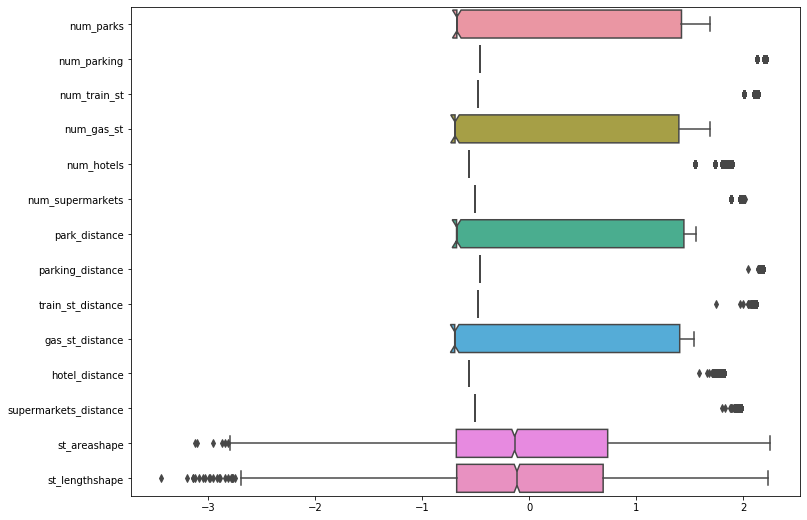

interactive(children=(Dropdown(description='variable', options=('num_parks', 'num_parking', 'num_train_st', 'n…

                         mean      skew  kurtosis
st_lengthshape   1.200346e-11  0.074136 -0.416363
st_areashape    -9.236937e-12  0.087776 -0.527106
gas_st_distance -3.397207e-17  0.746665 -1.439158
num_gas_st       2.480713e-16  0.774435 -1.361356
park_distance   -6.291863e-16  0.800310 -1.357136
                           mean      skew  kurtosis
num_supermarkets  -2.099141e-17  1.458327  0.129884
train_st_distance  4.322529e-16  1.632210  0.664502
num_train_st       3.601563e-17  1.633689  0.671810
parking_distance  -8.609256e-16  1.725157  0.976518
num_parking       -4.973361e-16  1.725860  0.980164


In [17]:
geo_spatial = transform_and_plot(
    'num_parks', 'st_lengthshape', 'geo_spatial_transformed.jpg', power=1, log=1)

#### Electricity Consumption Features

>100% of features appeared to be positively skewed with no negative values but with zero values. A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `elec_nd_con_mean` was the most normally distributed (mean non-domestic electricity consumption in a MSOA) 
>2. `elec_nd_con` was the most skewed distribution (non-domestic electricity consumption in a MSOA)

[ -7.70132802  -3.95032256 -14.54883646  -7.05203363   1.05924992
   1.12625862   6.91311397   1.89854933   1.02953339  -0.03071753
   0.13611556]


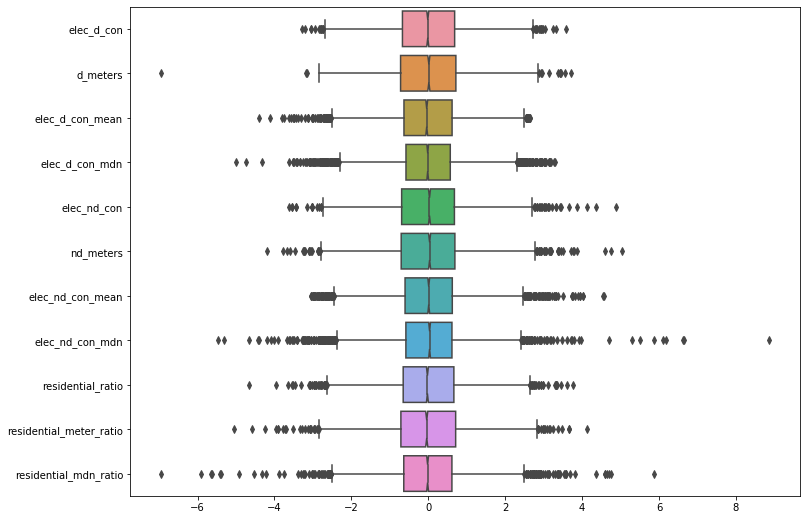

interactive(children=(Dropdown(description='variable', options=('elec_d_con', 'd_meters', 'elec_d_con_mean', '…

                                 mean      skew  kurtosis
elec_d_con_mdn          -1.759704e-09 -0.029134  0.725816
residential_meter_ratio  7.563118e-16 -0.001102  0.162395
elec_nd_con             -6.030942e-16  0.001002  0.073441
residential_ratio       -1.058071e-15  0.003142  0.141516
d_meters                 6.670640e-12  0.003773 -0.046287
                               mean      skew  kurtosis
elec_d_con_mean        6.419621e-03  0.008929  0.197888
elec_d_con             6.633671e-07  0.010404 -0.243971
residential_mdn_ratio -2.599015e-16  0.023239  1.857108
elec_nd_con_mean       1.329047e-16  0.044235  0.667563
elec_nd_con_mdn        1.169650e-15  0.052949  3.174558


In [18]:
electricity = transform_and_plot(
    'elec_d_con', 'residential_mdn_ratio', 'electricity_transformed.jpg', log=1, power=1)

In [19]:
df['charge_pt_cbrt'] = np.cbrt(df.charge_points)
df['charge_pt_log'] = np.log1p(df.charge_points)
trans_df = pd.concat([soc_econ1, soc_econ2, population, transport, car_ownreg,
                      geo_spatial, electricity, df.loc[:, 'metropolitan':]], axis=1)
trans_df.head()

,income_score,employment_score,idaci_score,idaopi_score,adultskills_score,health_score,crime_score,chanyp_score,geo_bar_score,widerbar_score,...,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,metropolitan,charge_points,charge_pt_cbrt,charge_pt_log
0,0.088871,-0.328150,0.866820,1.465212,-2.137034,0.481368,1.153863,-0.060499,-1.454398,1.336708,...,0.197921,-2.841671,-2.338393,-1.257011,0.162572,1.235550,1,1.0,1.0,0.693147
1,0.900348,0.866787,0.582644,0.953194,0.914859,1.005980,0.971086,0.801525,0.912208,-0.030783,...,-0.143319,-0.200073,-0.517636,-0.544830,-0.100296,0.118798,0,0.0,0.0,0.000000
2,-0.007405,0.211704,0.207690,-0.513265,0.539791,-0.064669,0.941640,-0.290776,0.513203,-0.206539,...,-0.332959,1.274794,1.292622,0.339985,0.095846,-1.692076,1,0.0,0.0,0.000000
3,1.040667,1.380963,1.107423,0.396439,1.401800,0.977931,0.258423,1.901116,0.553978,-0.093324,...,-0.535777,2.636012,1.338312,1.087951,0.655943,-1.574221,0,0.0,0.0,0.000000
4,1.685602,1.808018,1.718330,1.433688,1.136867,2.223234,-0.089536,1.262386,-1.253147,-0.304613,...,-1.263597,-0.004359,0.586896,1.333457,1.292716,-1.029627,1,0.0,0.0,0.000000


In [ ]:
new_columns = []
old_columns = []
for x in range(0, 180, 2):
    two_variables = df.iloc[:, x+28:x+30].columns
    old_columns.extend(two_variables)

    mode = two_variables[0].split("_")[0]
    if two_variables[0].split("_")[-1] == 'nhb':
        activity = "_".join([two_variables[0].split(
            "_")[-2], two_variables[0].split("_")[-1]])
    else:
        activity = two_variables[0].split("_")[-1]
    new_columns.append(f'{mode}_{activity}')
    # print(df.iloc[:,x+28:x+30].columns[0].split("_")[-1])
    df[f'{mode}_{activity}'] = df.iloc[:, x+28:x+30].sum(axis=1)

#old_columns = []
for x in range(-90, 0):
    first = df.iloc[:, x].name
    second = df.iloc[:, x+8].name
    if first.split("_")[0] == second.split("_")[0]:
        df[first] = df[first]+df[second]
        old_columns.append(second)
        # print(first,second)

df = df.drop(old_columns, axis=1)
df.iloc[:, -48:]
#df[f'transport{x}'] = df.iloc[:,28:30].sum(axis=1)

In [20]:
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']
activities = ['work', 'empbus', 'school', 'shopping',
              'personbus', 'social', 'friends', 'holiday']
direction = ['to', 'from']

### Correlation of Features with Target variable

In [42]:
def search_corr(variable_list, target_list, figsize, num):
    list1 = variable_list
    list2 = target_list
    matrix = pd.concat(
        [trans_df.loc[:, list1], trans_df.loc[:, list2]], axis=1).corr()
    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(round(matrix, 3), mask=mask, annot=True, cmap='winter',vmin=-1,vmax=1,linewidths=0.1)
    plt.ylim(num, 0)

    result = matrix[target_list]
    sort_list = result.charge_points.apply(
        lambda x: abs(x)).sort_values(ascending=False)[3:5].index
    print(matrix[target_list].loc[sort_list, :])
    return list(sort_list)


def just_plot(variable_list, target_list, figsize, num, filename):
    list1 = variable_list
    list2 = target_list
    matrix = pd.concat(
        [trans_df.loc[:, list1], trans_df.loc[:, list2]], axis=1).corr()
    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=figsize)
    sns.heatmap(round(matrix, 3), mask=mask, annot=True, cmap='winter')
    plt.ylim(num, 0)
    plt.savefig("../reports/figures/"+filename)

In [43]:
feat_list = []

#### SocioEconomic Feature correlations

There was a low correlation of socio-economic features with the number of EV charge points in a MSOA

> 1. The **top 2** correlated features were `workingage_pop` and `16_59_pop`

> 2. There was high intercorrelation between the `workingage_pop` and `16_59_pop` as expected as the working age population tends to be between the age of 16 - 59.

                charge_points  charge_pt_cbrt  charge_pt_log
workingage_pop       0.223045        0.252298       0.260340
16_59_pop            0.219612        0.246830       0.255275


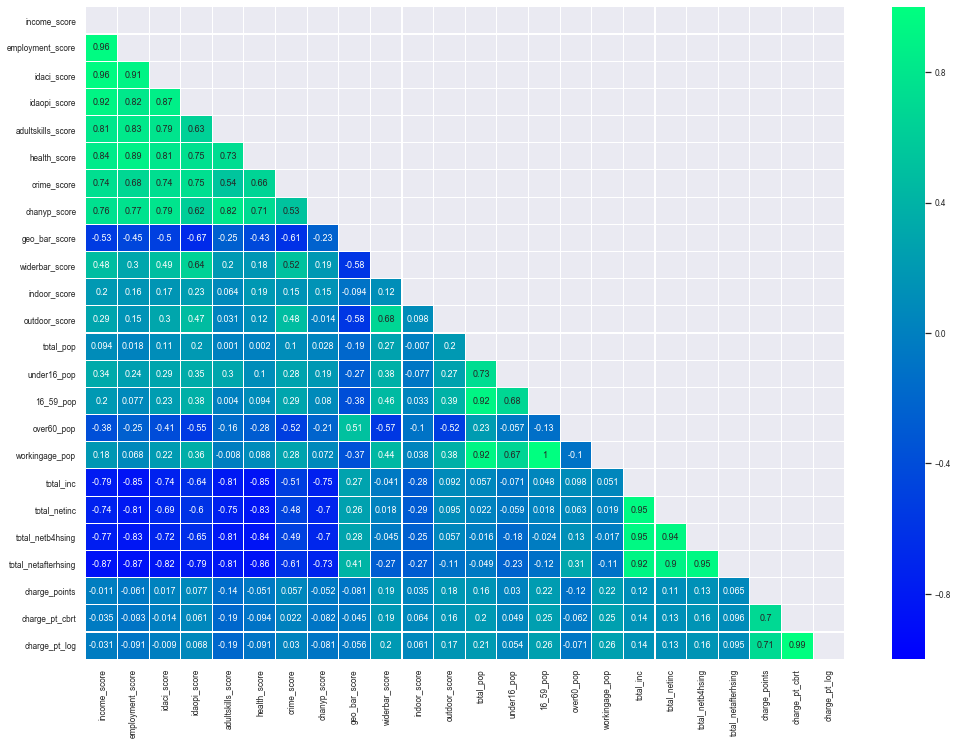

In [44]:
soc_econ_list = trans_df.loc[:, 'income_score':'total_netafterhsing'].columns


targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']

feat_list.extend(search_corr(soc_econ_list, targets_list, (17, 12), 24))

#### Transportation Feature correlations
There was a mildly low correlation of transportation features with the number of EV charge points in a MSOA

The **top 2** correlated features for each mode of transport were as follows:<br>
> 1. **walking to/from a social event or to/from conduct employers business:**<br>
`walk_empbus` and `walk_social`<br><br>
> - **cycling to/from a social event or to/from conduct employers business:**<br>
`cycle_empbus` and `cycle_social`<br><br>
> - **driving alone to/from work or to conduct employers business:**<br>
`cardriver_empbus` and `cardriver_work` <br><br>
> - **driving with passengers to/from work or to conduct employers business:**<br>
`carpassenger_empbus` and `carpassenger_work` <br><br>
> - **taking the bus to/from a social event or to/from conduct employers business:**<br>
`buscoach_empbus` and `buscoach_social`<br><br>
> - **taking the train to/from a social event or to/from conduct employers business:**<br>
`rail_empbus` and `rail_social`<br><br>

**EV chargepoint locations overall tend to be located in places where there is large amount of journeys for social events, work and conducting employers business**

             charge_points  charge_pt_cbrt  charge_pt_log
walk_empbus       0.299348        0.369697       0.376671
walk_social       0.271987        0.340257       0.345321
              charge_points  charge_pt_cbrt  charge_pt_log
cycle_empbus       0.318545        0.387989       0.396619
cycle_social       0.314102        0.398010       0.402190
                  charge_points  charge_pt_cbrt  charge_pt_log
cardriver_empbus       0.297280        0.411738       0.409212
cardriver_work         0.231856        0.311646       0.308506
                     charge_points  charge_pt_cbrt  charge_pt_log
carpassenger_empbus       0.306125        0.421971       0.420710
carpassenger_work         0.175680        0.234473       0.230916
                 charge_points  charge_pt_cbrt  charge_pt_log
buscoach_empbus       0.301517        0.336726       0.347928
buscoach_social       0.298712        0.337062       0.347353
             charge_points  charge_pt_cbrt  charge_pt_log
rail_empbus       

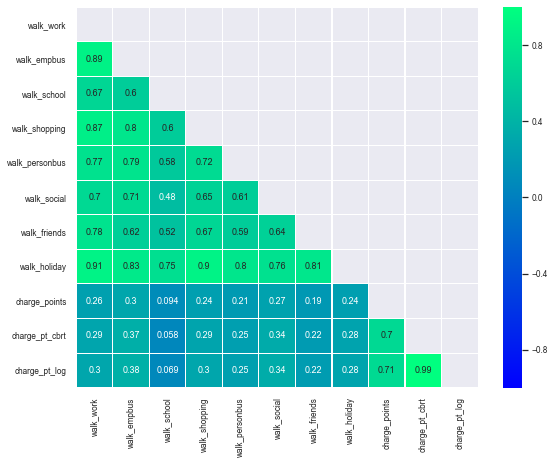

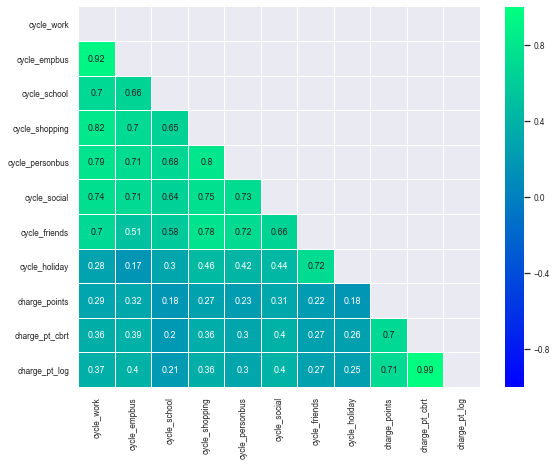

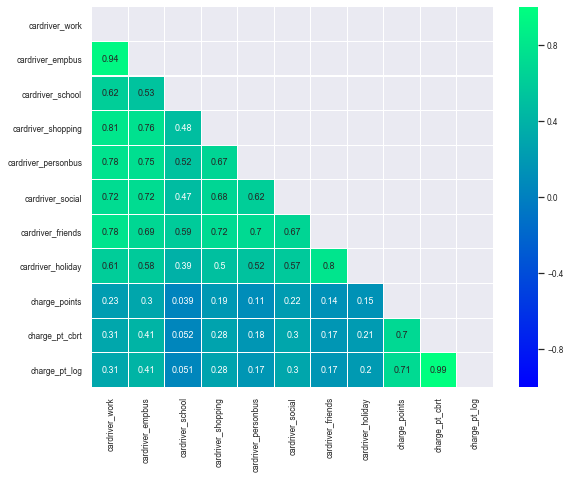

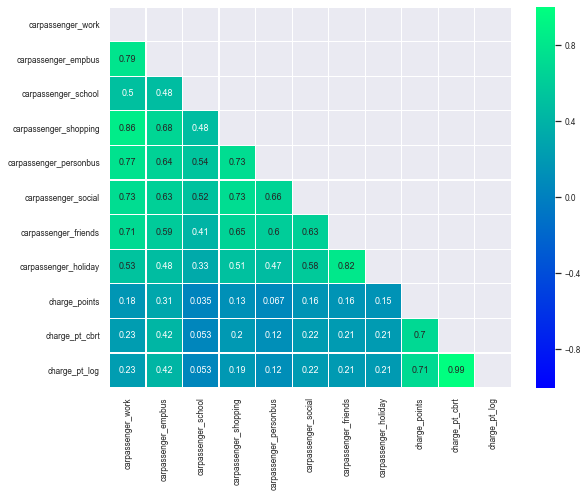

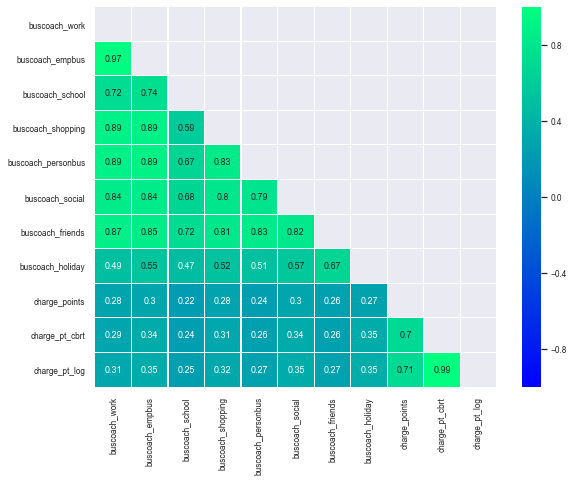

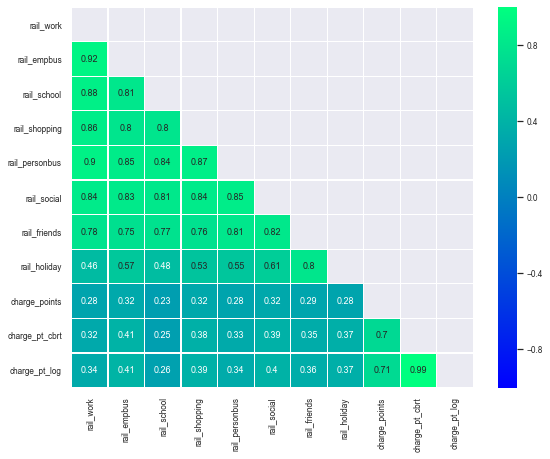

In [45]:
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']

for num, x in enumerate(mode):
    transp_list = trans_df.loc[:, f'{x}_work':f'{x}_holiday'].columns
    feat_list.extend(search_corr(transp_list, targets_list, (9, 7), 11))

#### Car Ownership Feature correlations

There was a low correlation of car ownership features with the number of EV charge points in a MSOA

The **top 2** correlated features for car ownership were as follows:<br>

> 1. **no car ownership and owners of 3+ cars:**<br>
`no_car` and `three+_car` <br>
> 2. There was high intercorrelation between the time related variables.

            charge_points  charge_pt_cbrt  charge_pt_log
no_car           0.181068        0.179904       0.189843
three+_car      -0.116794       -0.079967      -0.091352


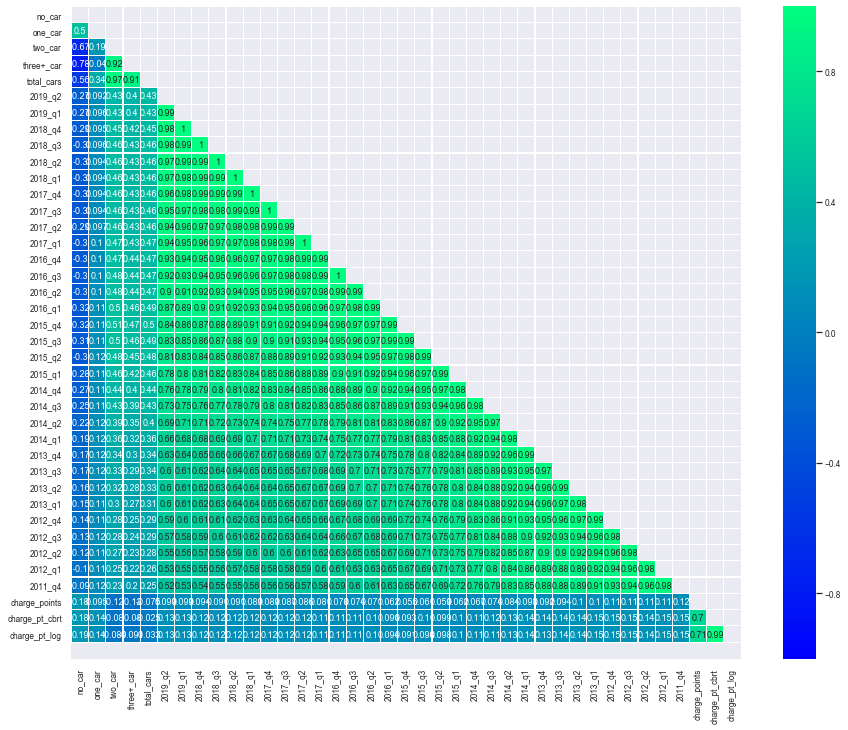

In [46]:
sns.set(font_scale=0.75)
cars_list = trans_df.loc[:, 'no_car':'2011_q4'].columns
feat_list.extend(search_corr(cars_list, targets_list, (15, 12), 40))

In [ ]:
sns.lmplot('idaopi_score', 'no_car', data=trans_df, order=1)
plt.xscale('linear')

In [ ]:
sns.lmplot('nd_meters', 'carpassenger_empbus', data=trans_df, order=3)
plt.xscale('linear')

In [ ]:
sns.set(font_scale=0.5)
sns.clustermap(trans_df.corr(),figsize=(30,30),annot=True,fmt='g')
plt.savefig("heat_map.jpg",dpi=1000);

In [ ]:
sns.lmplot('st_areashape', 'metropolitan', data=trans_df, order=1)
plt.xscale('linear')

#### Geo-Spatial Feature correlations
There was a low correlation of geo-spatial features with the number of EV charge points in a MSOA

The **top 2** correlated features for geo-spatial features were as follows:<br>

> 1. **Number of train stations and their respective distance from the centre of the MSOA**<br>
`num_train_st` and `train_st_distance` <br>

In [ ]:
geo_list = trans_df.loc[:, 'num_parks':'st_lengthshape'].columns
feat_list.extend(search_corr(geo_list, targets_list, (10, 8), 17))

#### Electricity Consumption Feature correlations
There was a low correlation of electricity consumption features with the number of EV charge points in a MSOA

The **top 2** correlated features for electricity consumption were as follows:<br>

> 1. **Non-domestic electiricty consumption rates and the number of domestic and non-domestic electricity meters**<br>
`elec_nd_con` and`nd_meters`<br>
> 2. There was high intercorrelation between the `elec_nd_con` and `nd_meters` as expected due to high non domestic electricity consumption when there are high numbers of meters

In [ ]:
electricity_list = trans_df.loc[:, 'elec_d_con':'metropolitan'].columns
feat_list.extend(search_corr(electricity_list, targets_list, (8, 6), 15))

In [ ]:
just_plot(feat_list, targets_list, (18, 15), 33, "EVcorrheatmap.jpg")

In [ ]:
trans_df.drop(['charge_pt_log', 'charge_pt_cbrt',
               'charge_points'], axis=1).shape

In [ ]:
trans_df

In [ ]:
y.mean()

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
y = trans_df.charge_pt_log.values
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
pd.DataFrame(model.coef_, index=X.columns, columns=['coef']).apply(
    lambda x: abs(x)).sort_values(by='coef', ascending=False).head(40)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

np.sqrt(mean_squared_error(y,model.predict(X)))


In [ ]:
plt.plot(model.predict(X),y,'o')
plt.plot([0,5],[0,5])
plt.ylim(0,5)
plt.xlim(0,5);

In [ ]:
{
    "tags": [
        "hide_input",
        "hide_output"
    ]
}

In [ ]:
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
X = trans_df[['indoor_score','adultskills_score','cardriver_empbus','cycle_social','buscoach_empbus','num_parking','elec_nd_con','walk_empbus','residential_ratio','nd_meters']]#,buscoach_empbus','walk_work']]
#X = trans_df[['rail_shopping']]
y = trans_df.charge_points.apply(lambda x: 1 if x > 0 else 0).values
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
print(model.score(X, y))
coef_table = pd.DataFrame(model.coef_[0], index=X.columns, columns=['coef'])
coef_table['abs_coef'] = coef_table.coef.apply(lambda x: abs(x))
coef_table.sort_values(by='abs_coef', ascending=False).head(40)